In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
from deepQLAux import rHQET 
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# dataset
df = pd.read_csv("./NHANES.csv")

In [3]:
df.shape

(2330, 13)

In [4]:
df.head(5)

,BMI,School_meal,age,ChildSex,afam,hisam,povlev_200,SupNut_prog,FoodStamp_prog,FoodSec_chd,AnyIns,RefSex,RefAge
0,15.18,0,6,0,0,0,1,0,0,0,1,1,51
1,17.93,0,6,1,0,1,0,1,0,1,1,1,27
2,15.15,1,5,1,0,1,0,0,0,0,0,0,24
3,15.69,1,11,0,0,0,0,0,0,0,1,1,44
4,37.40,0,14,0,0,1,0,0,0,0,0,0,48


In [5]:
y_colname = "BMI"
tre_colname = "School_meal"

In [6]:
# fit model
tau_seq = [(i+2)/100 for i in range(97)]
parms = {}
for tau in tau_seq:
    hqr_model = rHQET(df,y_colname,tre_colname)
    hqr_model.fit(tau=tau,alpha_level=0.05,k_fold=10,denOrder2=True,
                  logitModel="forest",qrModel="forest",
                  n_estimators=100,min_samples_split=3,min_samples_leaf=10,
                  lr=None,nodes=[3,64],batch_size=256,epochs=512,random_state=100)
    
    parms[f"tau{tau}"] = hqr_model.params_df

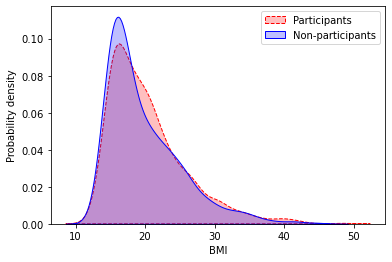

In [7]:
# Probability densities
treated_bmi = df[df["School_meal"]==1]["BMI"]
control_bmi = df[df["School_meal"]==0]["BMI"]

# Create a joint density plot
sns.kdeplot(treated_bmi, shade=True, color="red", label="Participants", linestyle="--")
sns.kdeplot(control_bmi, shade=True, color="blue", label="Non-participants", linestyle="-")

# Add labels and title
plt.xlabel("BMI")
plt.ylabel("Probability density")

# Add legend
plt.legend()
plt.savefig("bmi_density_plot.pdf")
# Show the plot
plt.show()

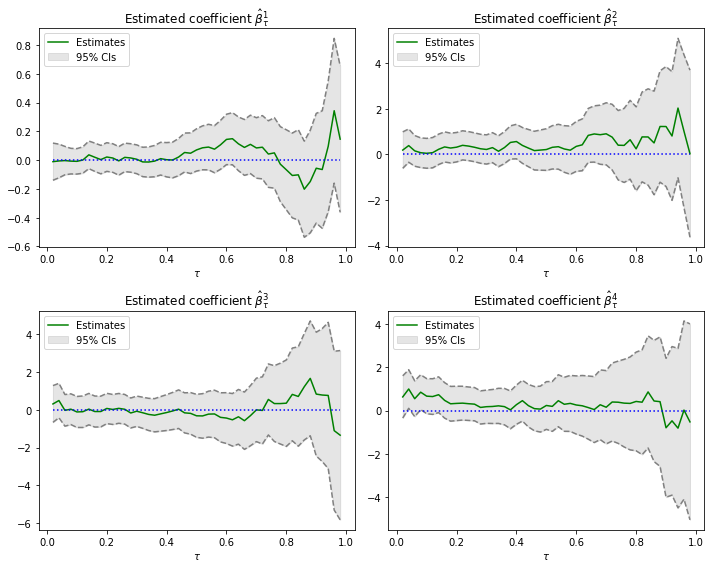

In [8]:
tau_seq = [(i+2)/100 for i in range(97)]
x =[(i+1)/50 for i in range(49)]
y1 = []
y1_upper = []
y1_lower = []
y2 = []
y2_upper = []
y2_lower = []

y3 = []
y3_upper = []
y3_lower = []
y4 = []
y4_upper = []
y4_lower = []
x_name1 = "age"
x_name2 = "ChildSex"
x_name3 = "afam"
x_name4 = "hisam"
for tau in x:
    cf = parms[f"tau{tau}"]
    y1.append(cf.loc[x_name1][0])
    y1_lower.append(cf.loc[x_name1][1])
    y1_upper.append(cf.loc[x_name1][2])
    
    y2.append(cf.loc[x_name2][0])
    y2_lower.append(cf.loc[x_name2][1])
    y2_upper.append(cf.loc[x_name2][2])

    y3.append(cf.loc[x_name3][0])
    y3_lower.append(cf.loc[x_name3][1])
    y3_upper.append(cf.loc[x_name3][2])
    y4.append(cf.loc[x_name4][0])
    y4_lower.append(cf.loc[x_name4][1])
    y4_upper.append(cf.loc[x_name4][2])
    
zero_line = [0 for _ in x]

# Create the figure and two panels
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Plot the first curve in the left panel
ax1.plot(x, y1, color='green', label='Estimates')
ax1.fill_between(x, y1_lower, y1_upper, alpha=0.2, color='gray', label='95% CIs')
ax1.plot(x, y1_upper, color='gray', linestyle="--")
ax1.plot(x, y1_lower, color='gray', linestyle="--")
ax1.plot(x, zero_line, color='blue', linestyle="dotted")
ax1.set_xlabel(r'$\tau$')
ax1.legend(loc='best')
ax1.set_title(r"Estimated coefficient $\hat{\beta}_\tau^1$")

# Plot the second curve in the right panel
ax2.plot(x, y2, color='green', label='Estimates')
ax2.fill_between(x, y2_lower, y2_upper, alpha=0.2, color='gray', label='95% CIs')
ax2.plot(x, y2_upper, color='gray', linestyle="--")
ax2.plot(x, y2_lower, color='gray', linestyle="--")
ax2.plot(x, zero_line, color='blue', linestyle="dotted")
ax2.set_xlabel(r'$\tau$')
ax2.legend(loc='best')
ax2.set_title(r"Estimated coefficient $\hat{\beta}_\tau^2$")

ax3.plot(x, y3, color='green', label='Estimates')
ax3.fill_between(x, y3_lower, y3_upper, alpha=0.2, color='gray', label='95% CIs')
ax3.plot(x, y3_upper, color='gray', linestyle="--")
ax3.plot(x, y3_lower, color='gray', linestyle="--")
ax3.plot(x, zero_line, color='blue', linestyle="dotted")
ax3.set_xlabel(r'$\tau$')
ax3.legend(loc='best')
ax3.set_title(r"Estimated coefficient $\hat{\beta}_\tau^3$")

ax4.plot(x, y4, color='green', label='Estimates')
ax4.fill_between(x, y4_lower, y4_upper, alpha=0.2, color='gray', label='95% CIs')
ax4.plot(x, y4_upper, color='gray', linestyle="--")
ax4.plot(x, y4_lower, color='gray', linestyle="--")
ax4.plot(x, zero_line, color='blue', linestyle="dotted")
ax4.set_xlabel(r'$\tau$')
ax4.legend(loc='best')
ax4.set_title(r"Estimated coefficient $\hat{\beta}_\tau^4$")

# Add a common title for the figure
#plt.suptitle('Estimated function with confidence intervals')

# Add a tight layout to avoid overlapping labels
fig.tight_layout()
plt.savefig("coef_plot1.pdf")

# Show or save the plot
plt.show()

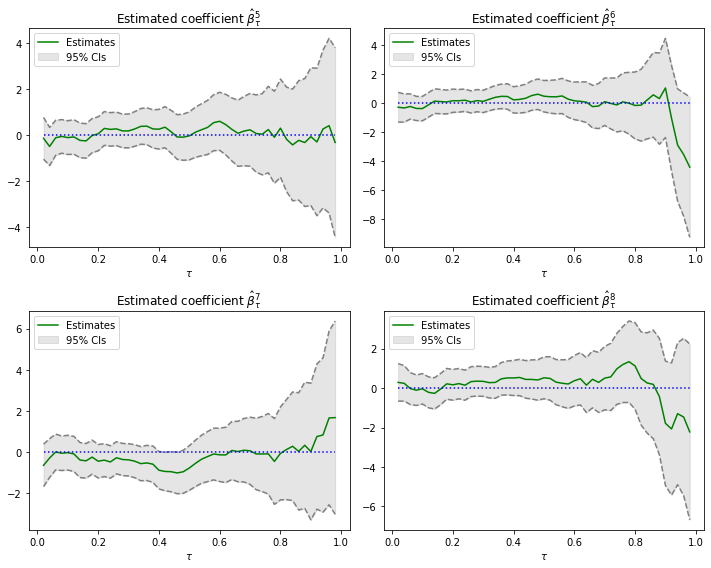

In [9]:
tau_seq = [(i+2)/100 for i in range(97)]
x =[(i+1)/50 for i in range(49)]
y1 = []
y1_upper = []
y1_lower = []
y2 = []
y2_upper = []
y2_lower = []

y3 = []
y3_upper = []
y3_lower = []
y4 = []
y4_upper = []
y4_lower = []
x_name1 = "povlev_200"
x_name2 = "SupNut_prog"
x_name3 = "FoodStamp_prog"
x_name4 = "FoodSec_chd"
for tau in x:
    cf = parms[f"tau{tau}"]
    y1.append(cf.loc[x_name1][0])
    y1_lower.append(cf.loc[x_name1][1])
    y1_upper.append(cf.loc[x_name1][2])
    
    y2.append(cf.loc[x_name2][0])
    y2_lower.append(cf.loc[x_name2][1])
    y2_upper.append(cf.loc[x_name2][2])

    y3.append(cf.loc[x_name3][0])
    y3_lower.append(cf.loc[x_name3][1])
    y3_upper.append(cf.loc[x_name3][2])
    y4.append(cf.loc[x_name4][0])
    y4_lower.append(cf.loc[x_name4][1])
    y4_upper.append(cf.loc[x_name4][2])
    
zero_line = [0 for _ in x]

# Create the figure and two panels
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Plot the first curve in the left panel
ax1.plot(x, y1, color='green', label='Estimates')
ax1.fill_between(x, y1_lower, y1_upper, alpha=0.2, color='gray', label='95% CIs')
ax1.plot(x, y1_upper, color='gray', linestyle="--")
ax1.plot(x, y1_lower, color='gray', linestyle="--")
ax1.plot(x, zero_line, color='blue', linestyle="dotted")
ax1.set_xlabel(r'$\tau$')
#ax1.set_ylabel('Y1')
ax1.legend(loc='best')
ax1.set_title(r"Estimated coefficient $\hat{\beta}_\tau^5$")

# Plot the second curve in the right panel
ax2.plot(x, y2, color='green', label='Estimates')
ax2.fill_between(x, y2_lower, y2_upper, alpha=0.2, color='gray', label='95% CIs')
ax2.plot(x, y2_upper, color='gray', linestyle="--")
ax2.plot(x, y2_lower, color='gray', linestyle="--")
ax2.plot(x, zero_line, color='blue', linestyle="dotted")
ax2.set_xlabel(r'$\tau$')
#ax2.set_ylabel('Y2')
ax2.legend(loc='best')
ax2.set_title(r"Estimated coefficient $\hat{\beta}_\tau^6$")

ax3.plot(x, y3, color='green', label='Estimates')
ax3.fill_between(x, y3_lower, y3_upper, alpha=0.2, color='gray', label='95% CIs')
ax3.plot(x, y3_upper, color='gray', linestyle="--")
ax3.plot(x, y3_lower, color='gray', linestyle="--")
ax3.plot(x, zero_line, color='blue', linestyle="dotted")
ax3.set_xlabel(r'$\tau$')
#ax3.set_ylabel('Y3')
ax3.legend(loc='best')
ax3.set_title(r"Estimated coefficient $\hat{\beta}_\tau^7$")

ax4.plot(x, y4, color='green', label='Estimates')
ax4.fill_between(x, y4_lower, y4_upper, alpha=0.2, color='gray', label='95% CIs')
ax4.plot(x, y4_upper, color='gray', linestyle="--")
ax4.plot(x, y4_lower, color='gray', linestyle="--")
ax4.plot(x, zero_line, color='blue', linestyle="dotted")
ax4.set_xlabel(r'$\tau$')
ax4.legend(loc='best')
ax4.set_title(r"Estimated coefficient $\hat{\beta}_\tau^8$")

# Add a common title for the figure
#plt.suptitle('Estimated function with confidence intervals')

# Add a tight layout to avoid overlapping labels
fig.tight_layout()
plt.savefig("coef_plot2.pdf")

# Show or save the plot
plt.show()

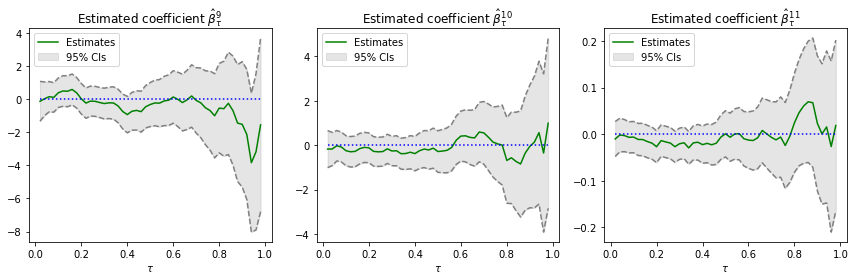

In [10]:
tau_seq = [(i+2)/100 for i in range(97)]
x =[(i+1)/50 for i in range(49)]
y1 = []
y1_upper = []
y1_lower = []
y2 = []
y2_upper = []
y2_lower = []

y3 = []
y3_upper = []
y3_lower = []
y4 = []
y4_upper = []
y4_lower = []
x_name1 = "AnyIns"
x_name2 = "RefSex"
x_name3 = "RefAge"
x_name4 = "hisam"
for tau in x:
    cf = parms[f"tau{tau}"]
    y1.append(cf.loc[x_name1][0])
    y1_lower.append(cf.loc[x_name1][1])
    y1_upper.append(cf.loc[x_name1][2])
    y2.append(cf.loc[x_name2][0])
    y2_lower.append(cf.loc[x_name2][1])
    y2_upper.append(cf.loc[x_name2][2])

    y3.append(cf.loc[x_name3][0])
    y3_lower.append(cf.loc[x_name3][1])
    y3_upper.append(cf.loc[x_name3][2])
    y4.append(cf.loc[x_name4][0])
    y4_lower.append(cf.loc[x_name4][1])
    y4_upper.append(cf.loc[x_name4][2])
    
zero_line = [0 for _ in x]

# Create the figure and two panels
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first curve in the left panel
ax1.plot(x, y1, color='green', label='Estimates')
ax1.fill_between(x, y1_lower, y1_upper, alpha=0.2, color='gray', label='95% CIs')
ax1.plot(x, y1_upper, color='gray', linestyle="--")
ax1.plot(x, y1_lower, color='gray', linestyle="--")
ax1.plot(x, zero_line, color='blue', linestyle="dotted")
ax1.set_xlabel(r'$\tau$')
ax1.legend(loc='best')
ax1.set_title(r"Estimated coefficient $\hat{\beta}_\tau^9$")

# Plot the second curve in the right panel
ax2.plot(x, y2, color='green', label='Estimates')
ax2.fill_between(x, y2_lower, y2_upper, alpha=0.2, color='gray', label='95% CIs')
ax2.plot(x, y2_upper, color='gray', linestyle="--")
ax2.plot(x, y2_lower, color='gray', linestyle="--")
ax2.plot(x, zero_line, color='blue', linestyle="dotted")
ax2.set_xlabel(r'$\tau$')
ax2.legend(loc='best')
ax2.set_title(r"Estimated coefficient $\hat{\beta}_\tau^{10}$")

ax3.plot(x, y3, color='green', label='Estimates')
ax3.fill_between(x, y3_lower, y3_upper, alpha=0.2, color='gray', label='95% CIs')
ax3.plot(x, y3_upper, color='gray', linestyle="--")
ax3.plot(x, y3_lower, color='gray', linestyle="--")
ax3.plot(x, zero_line, color='blue', linestyle="dotted")
ax3.set_xlabel(r'$\tau$')
ax3.legend(loc='best')
ax3.set_title(r"Estimated coefficient $\hat{\beta}_\tau^{11}$")

ax4.plot(x, y4, color='green', label='Estimates')
ax4.fill_between(x, y4_lower, y4_upper, alpha=0.2, color='gray', label='95% CIs')
ax4.plot(x, y4_upper, color='gray', linestyle="--")
ax4.plot(x, y4_lower, color='gray', linestyle="--")
ax4.plot(x, zero_line, color='blue', linestyle="dotted")
ax4.set_xlabel(r'$\tau$')
ax4.legend(loc='best')
ax4.set_title(r"Estimated coefficient $\hat{\beta}_\tau^4$")

# Add a common title for the figure
#plt.suptitle('Estimated function with confidence intervals')

# Add a tight layout to avoid overlapping labels
fig.tight_layout()
plt.savefig("coef_plot3.pdf")

# Show or save the plot
plt.show()